In [2]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing Scrapped Dataset:

In [3]:
#Reading csv file 
df = pd.read_csv("R_P.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2.0 out of 5 stars
1,1,Overpriced,\n Overpriced for this mediocre product with ...,2.0 out of 5 stars
2,2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3.0 out of 5 stars
3,3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3.0 out of 5 stars
4,4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3.0 out of 5 stars
...,...,...,...,...
14448,14448,Really Nice,Multi function monitor is great.. All smart fe...,4
14449,14449,Great product,I am enjoying this monitor day in day out. Thi...,5
14450,14450,Wonderful,Only drawback i found is 16 amps plug.,4
14451,14451,Terrific purchase,Nice 👌 multipurpose for who can play movies vi...,5


 dataset we have about 14453 rows and 3 columns

### Exploratory Data Analysis [EDA]:

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [5]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [6]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 14453 Rows and 3 Columns in the dataset


In [7]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')


So above 3 are the column names in the dataset

In [8]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14453 entries, 0 to 14452
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  14362 non-null  object
 1   Review_Text   14344 non-null  object
 2   Ratings       14362 non-null  object
dtypes: object(3)
memory usage: 338.9+ KB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [9]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title     91
Review_Text     109
Ratings          91
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods

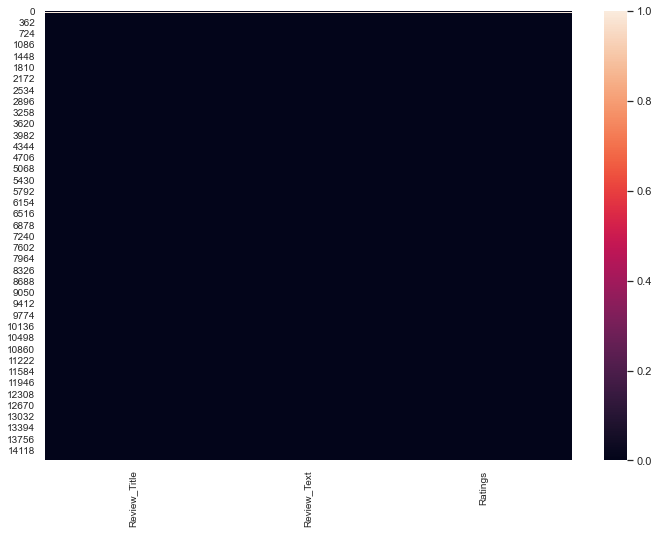

In [10]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

there is no null values

### Replacing nan values using imputation method:

In [11]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [12]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.



In [13]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5                     8338
4                     2629
1                     1200
3                      898
5.0 out of 5 stars     394
2                      391
1.0 out of 5 stars     231
4.0 out of 5 stars     155
2.0 out of 5 stars      64
3.0 out of 5 stars      62
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.


In [14]:
#Checking the mode
df["Ratings"].mode()

0    5
dtype: object

In [15]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [16]:
# Checking for null values again
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Review_Text     0
Ratings         0
dtype: int64


Now successfully we have replaced all the nan values using imputation method.

### Let's have a look into target column:


In [17]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '5', '4.0 out of 5 stars', '3', '4', '2',
       '1'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).



In [18]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [19]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

Now the target column looks good for our analysis.



### Now let's combine Review_Title and Review_Text to make a single column Review:


In [20]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [21]:
#let's have a look into our dataset
df

,Review_Title,Review_Text,Ratings,Review
0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2,Think twice before going for it \n &nbsp;Pros...
1,Overpriced,\n Overpriced for this mediocre product with ...,2,Overpriced \n Overpriced for this mediocre pr...
2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3,Build quality is not as good as shown in the A...
3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3,Speed and Visuals makes this a power machine! ...
4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3,Overpriced and unreliable \n For just i5 11th...
...,...,...,...,...
14448,Really Nice,Multi function monitor is great.. All smart fe...,4,Really Nice Multi function monitor is great.. ...
14449,Great product,I am enjoying this monitor day in day out. Thi...,5,Great product I am enjoying this monitor day i...
14450,Wonderful,Only drawback i found is 16 amps plug.,4,Wonderful Only drawback i found is 16 amps plug.
14451,Terrific purchase,Nice 👌 multipurpose for who can play movies vi...,5,Terrific purchase Nice 👌 multipurpose for who ...


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.



In [22]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

### Let's have a look into our Review column and see first 2 entries how the data looks:


In [23]:
# Checking data of first row in Review column
df['Review'][0]

"Think twice before going for it \n  &nbsp;Pros<br>-----<br>- Very light weight<br>- Screen brightness and clarity is awesome<br><br>Cons<br>------<br>- Speaker quality is horrible. Cannot use for calls at all. Crackling noise takes you to vinyl days.<br>- Body is not sturdy. The piece I received was slightly bent at the base, making the laptop wobble when I type.<br>- The bottom screw was hanging out with the thread gone due to incorrect tightening (so much for Japanese craftmanship)<br><br>Recommend to not purchase. It's not worth at this price point.\n"

In [24]:
# Checking data of second row in Review column
df['Review'][1]

'Overpriced \n  Overpriced for this mediocre product with no brand value, better to check out other products in reputed brands like dell, Hp, Asus\n'

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do good text processing.



## Text Processing:


In [25]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [26]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

### Let's have a look into our text again:


In [27]:
# Checking data of first row in Review column again
df['Review'][0]

'think twice before going for it    nbsppros   very light weight  screen brightness and clarity is awesome  cons   speaker quality is horrible cannot use for calls at all crackling noise takes you to vinyl days  body is not sturdy the piece i received was slightly bent at the base making the laptop wobble when i type  the bottom screw was hanging out with the thread gone due to incorrect tightening so much for japanese craftmanship  recommend to not purchase it is not worth at this price point '

In [28]:
# Checking data of second row in Review column again
df['Review'][1]

'overpriced    overpriced for this mediocre product with no brand value better to check out other products in reputed brands like dell hp asus '

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.



### Removing StopWords:


In [29]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
# Checking the text data again
df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [31]:
# Checking the text data again
df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

Now we have removed all stop words from the text data.



## Lemmatization:


In [37]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [38]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [39]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [40]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [41]:
# Checking the text data again
df['Review'][0]

'think twice go nbsppros light weight screen brightness clarity awesome con speaker quality horrible can not use call crackle noise take vinyl day body sturdy piece receive slightly bent base make laptop wobble type bottom screw hang thread go due incorrect tighten much japanese craftmanship recommend purchase worth price point'

In [42]:
# Checking the text data again
df['Review'][1]

'overprice overpriced mediocre product brand value well check product repute brand like dell hp asus'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.



## Text Normalization - Standardization:


In [43]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [44]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [45]:
# Checking the text data again
df['Review'][0]

'think twice go nbsppros light weight screen brightness clarity awesome con speaker quality horrible can not use call crackle noise take vinyl day body sturdy piece receive slightly bent base make laptop wobble type bottom screw hang thread go due incorrect tighten much japanese craftmanship recommend purchase worth price point'

In [46]:
# Checking the text data again
df['Review'][1]

'overprice overpriced mediocre product brand value well check product repute brand like dell hp asus'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now.

## Visualization:
### i) Word Counts:

In [47]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,50,think twice go nbsppros light weight screen br...
1,15,overprice overpriced mediocre product brand va...
2,112,build quality good show ad meet expectation ta...
3,16,speed visuals make power machine speaker sound...
4,29,overprice unreliable i th gen laptop way overp...


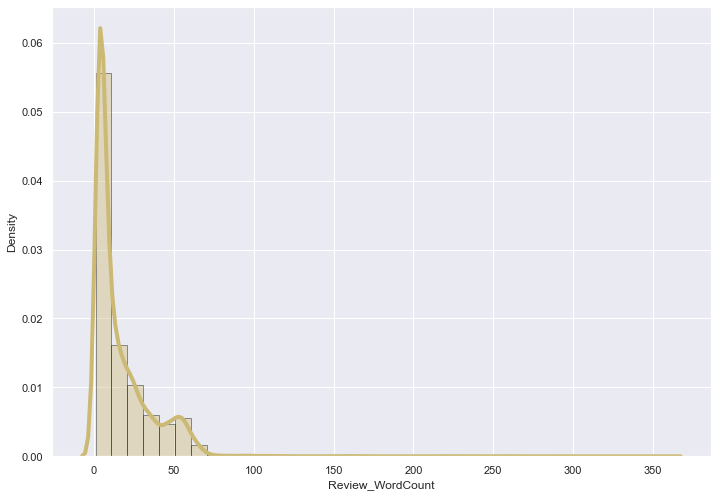

In [48]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data.

### ii) Character count:

In [49]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,328,think twice go nbsppros light weight screen br...
1,99,overprice overpriced mediocre product brand va...
2,729,build quality good show ad meet expectation ta...
3,114,speed visuals make power machine speaker sound...
4,190,overprice unreliable i th gen laptop way overp...


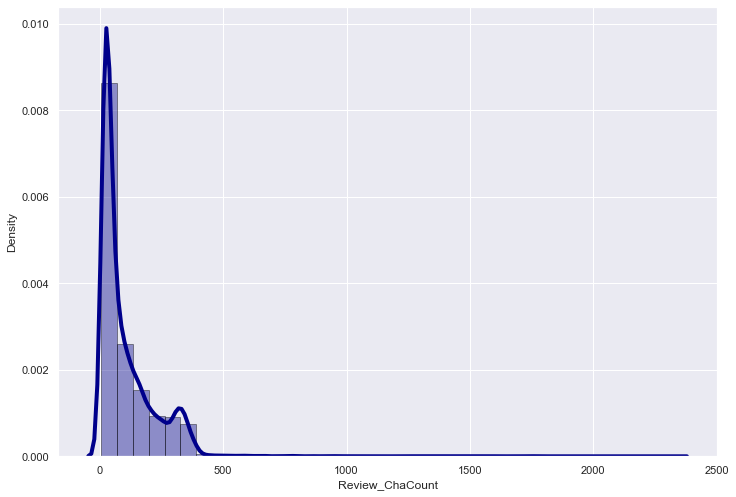

In [50]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.



## Removing Outliers:
As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [51]:
#Checking the shape of the dataset
df.shape

(14453, 4)

In [52]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(14384, 4)

Great by removing the outliers we are loosing 1.3% of data which is very less and it is in acceptable range.



## Plotting histograms for word count and character counts again after removing outliers:


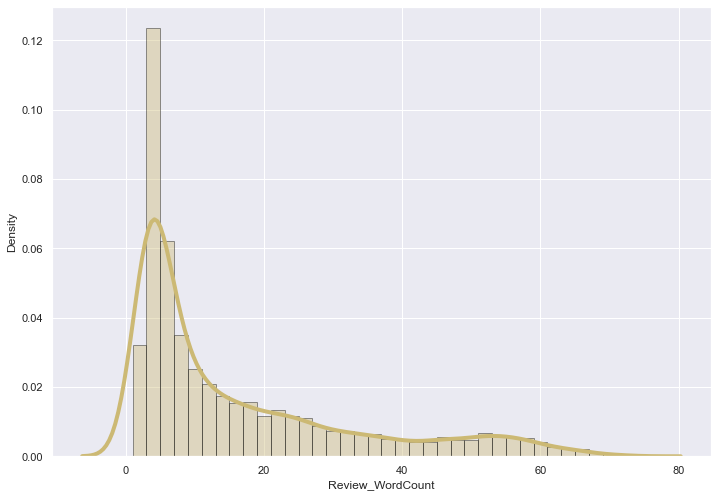

In [53]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

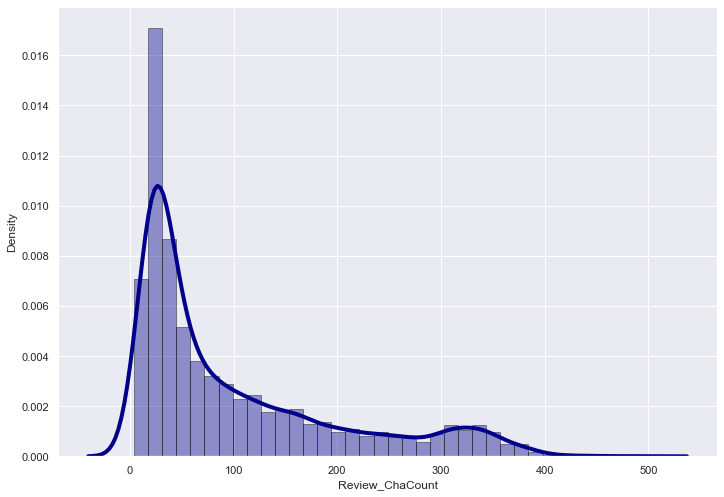

In [54]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.



### iii) Top 30 most frequently occuring words:


In [55]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

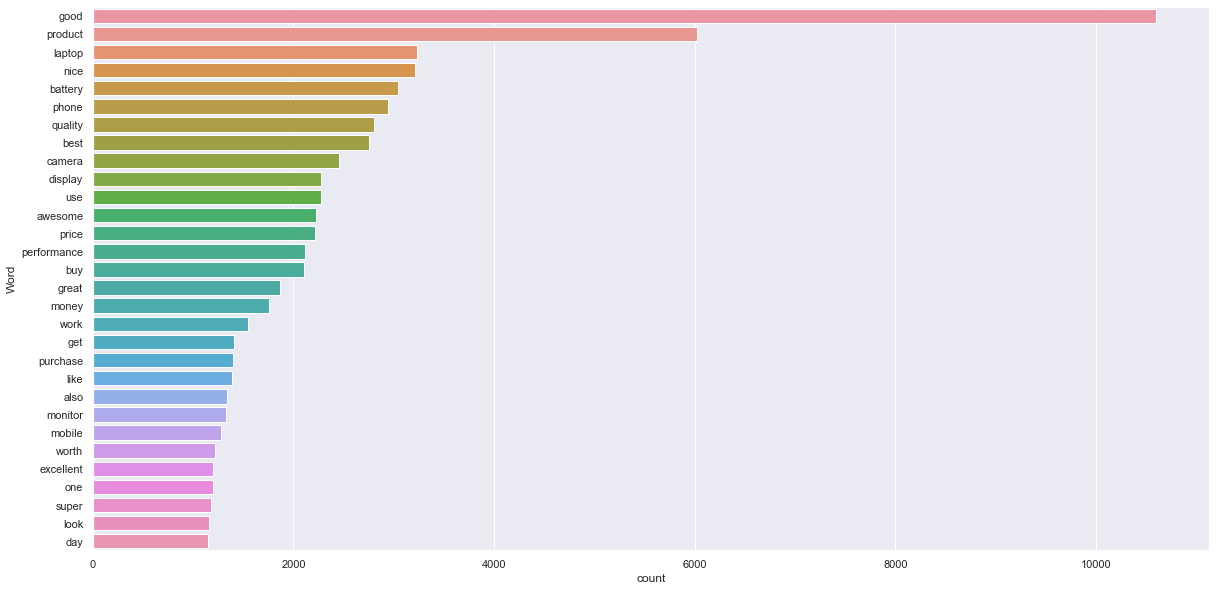

In [56]:
freq_words(df['Review'])

By seeing the above plot we can see that Good, prodout, quality......are occurring frequently.



### iv) Top 30 Rare words:


In [57]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

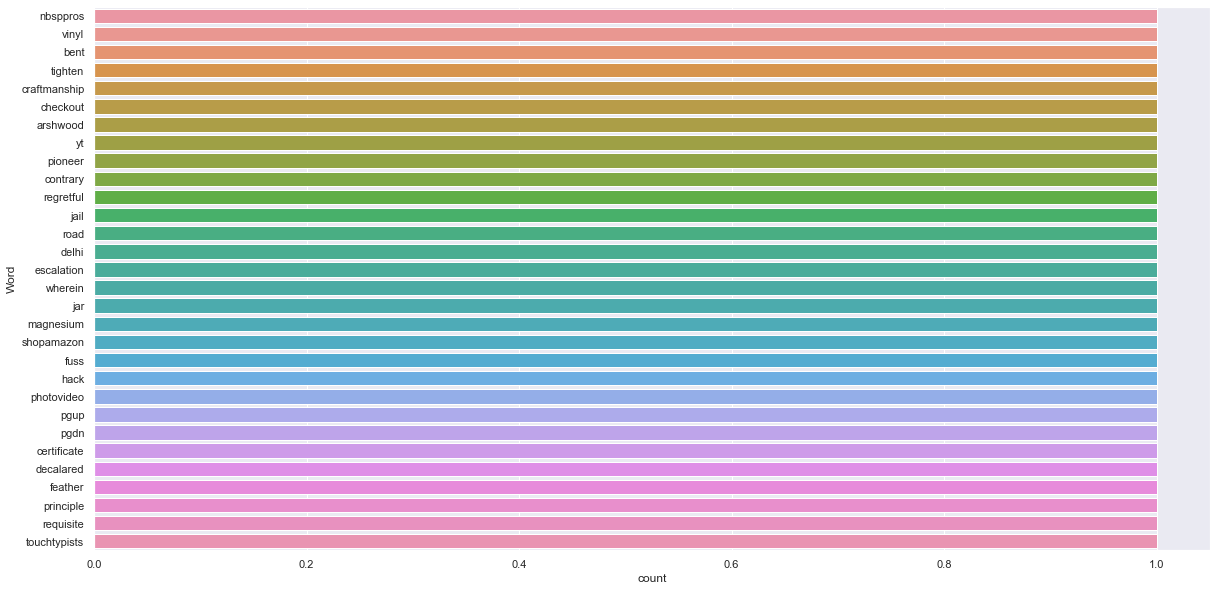

In [58]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review.



### v) Word cloud:


In [59]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

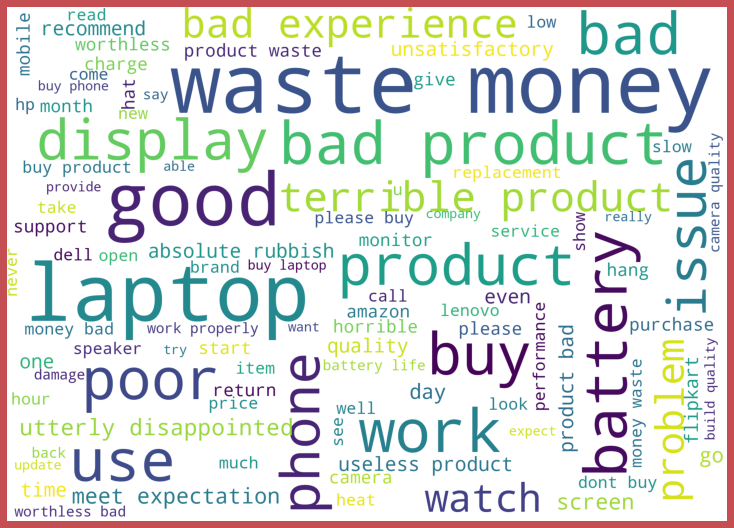

In [60]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

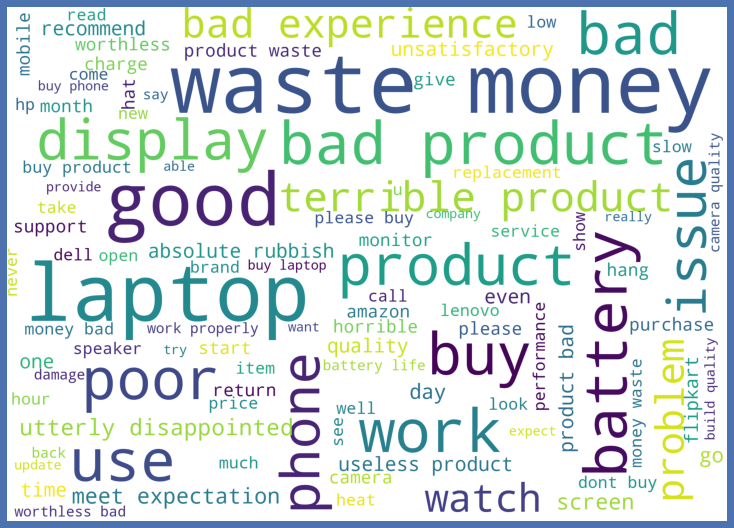

In [61]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

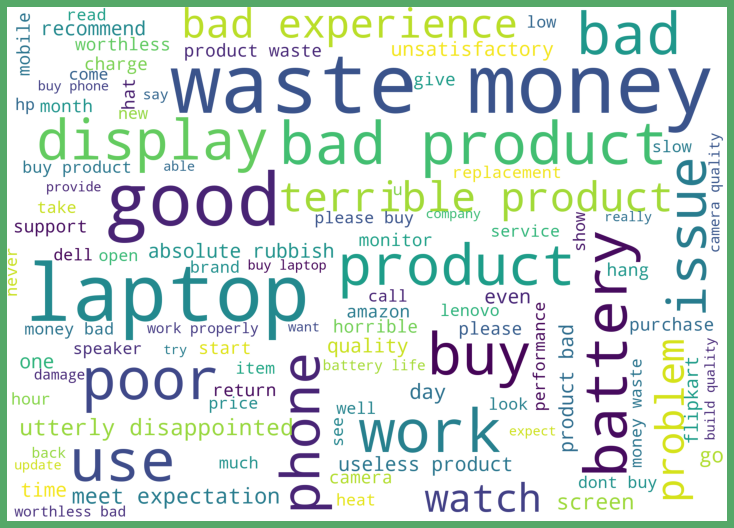

In [62]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

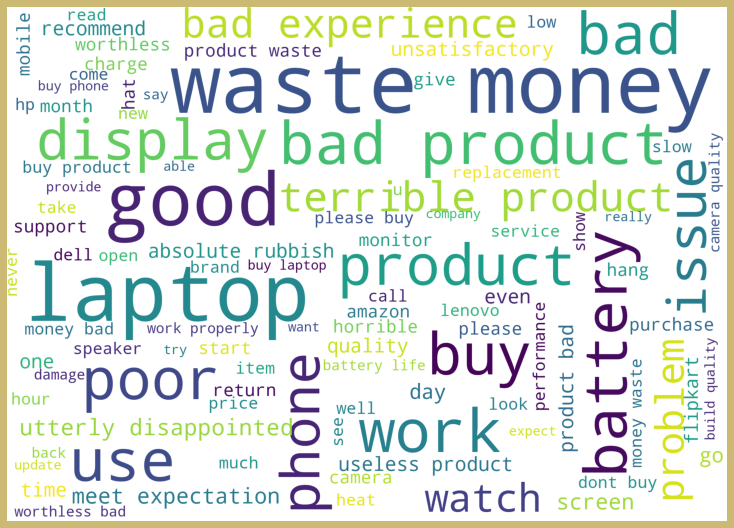

In [63]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

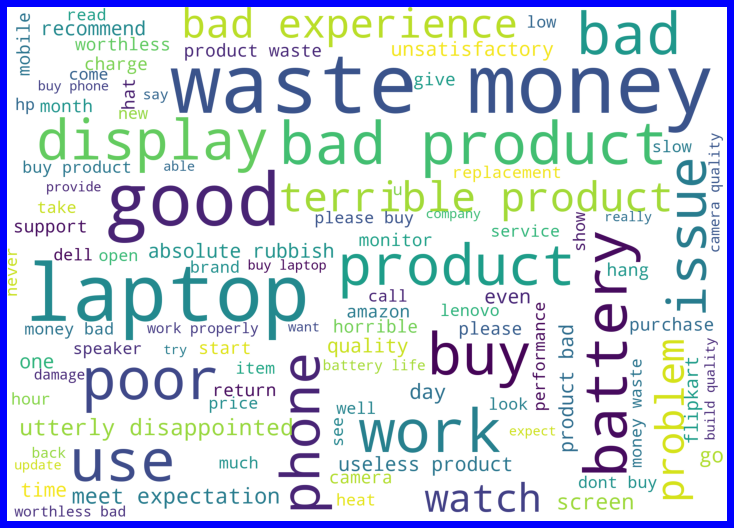

In [64]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

Observations:
    
From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
Here most frequent words used for each Rating is displayed in the word cloud.

In [65]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    8793
4    2766
1    1421
3     956
2     448
Name: Ratings, dtype: int64

## Model Building and Evaluation:


In [66]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

### Converting text data into vectors using Tfidf Vectorizer:


In [67]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [68]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [69]:
#we will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

## Splitting the data into train and test:


In [70]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

### Data Balancing:


In [71]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (10788, 150000)
x_test (3596, 150000)
y_train (10788,)
y_test (3596,)


Now let's do oversmapling in order to make data balanced.



In [72]:
#Checking the value counts of Ratings column
y.value_counts()

5    8793
4    2766
1    1421
3     956
2     448
Name: Ratings, dtype: int64

In [73]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 6594, 4: 2057, 1: 1090, 3: 716, 2: 331})


So we have maximum count 6594 for 5ratings hence will over sample mannually all the ratings to the mark 6594.



In [74]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 6594, 4: 2057, 1: 1090, 3: 716, 2: 331})
The number of classes after fit Counter({4: 37633, 5: 37633, 1: 37633, 2: 37633, 3: 37633})


So now we have successfully balanced the data. Let's proceed with model building.



In [77]:
# Importing libraries for ML Algorithms

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
sgd = SGDClassifier()

In [79]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [80]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 94.2714126807564
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.92      0.96      0.94       331
           2       0.94      0.82      0.88       117
           3       0.85      0.84      0.85       240
           4       0.90      0.91      0.91       709
           5       0.97      0.97      0.97      2199

    accuracy                           0.94      3596
   macro avg       0.92      0.90      0.91      3596
weighted avg       0.94      0.94      0.94      3596

Confusion Matrix : 
 [[ 317    4    3    4    3]
 [  11   96    7    1    2]
 [  10    1  202   15   12]
 [   1    1   14  647   46]
 [   7    0   12   52 2128]]

******************************LinearSVC******************************
Accuracy Score: 93.9098998887653
---------------------------------------------------
CLA

## Cross validation score:


In [81]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

# HyperParameter Tuning:


In [83]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [86]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, scoring='accuracy',n_jobs=-1,verbose=2)

In [88]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Final Model:


In [ ]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

## Model Saving:


In [ ]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

Finally I have saved the model into .pkl file.

